[View in Colaboratory](https://colab.research.google.com/github/santoshk17/Machine-Learning-Tools/blob/master/dogBreedsAseries.ipynb)

# Introduction

In this notebook, I would like to use fast AI library for image classification. For this purpose, I have chosen to use dog breeds dataset from [kaggle](https://www.kaggle.com/c/dog-breed-identification). 
The data taken from kaggle having both training and test set is around 750 MB. It is very difficult to place such a big file on colab. For this reason, the model is trained only for some species of dogs, whose species name starts with letter A. Doing so will bring down the memory requirement.


In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# Since fatAI library is under maintenance (10/16/2018) I would be using an alternate way of loading this library

#!pip install fastai
#!pip install torch

In [3]:
#  Alternate way

!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887
!apt update && apt install -y libsm6 libxext6
!python -m pip install torchtext==0.2.3

  Cloning https://github.com/fastai/fastai (to revision 2e1ccb58121dc648751e2109fc0fbf6925aa8887) to /tmp/pip-req-build-h5y6zom5
    100% |████████████████████████████████| 1.5MB 13.9MB/s 
    100% |████████████████████████████████| 122kB 16.9MB/s 
    100% |████████████████████████████████| 112kB 27.8MB/s 
    100% |████████████████████████████████| 184kB 27.2MB/s 
    100% |████████████████████████████████| 3.6MB 7.5MB/s 
    100% |████████████████████████████████| 496.4MB 33kB/s 
    100% |████████████████████████████████| 71kB 332kB/s 
    100% |████████████████████████████████| 61kB 22.8MB/s 
    100% |████████████████████████████████| 2.2MB 6.9MB/s 
    100% |████████████████████████████████| 11.6MB 3.1MB/s 
    100% |████████████████████████████████| 92kB 28.0MB/s 
    100% |████████████████████████████████| 112kB 30.8MB/s 
    100% |████████████████████████████████| 61kB 23.6MB/s 
    100% |████████████████████████████████| 81kB 26.4MB/s 
  Running setup.py bdist_wheel for fast

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
from google.colab import files
uploaded = files.upload()

Saving dogBreedA.zip to dogBreedA.zip


In [8]:
!unzip dogBreedA.zip
!ls

Archive:  dogBreedA.zip
   creating: dogBreedA/train/
   creating: dogBreedA/train/affenpinscher/
  inflating: dogBreedA/train/affenpinscher/00ca18751837cd6a22813f8e221f7819.jpg  
  inflating: dogBreedA/train/affenpinscher/01268f0007876a692907bda89468184c.jpg  
  inflating: dogBreedA/train/affenpinscher/0162107acd8f2588c0944b791d61bb0c.jpg  
  inflating: dogBreedA/train/affenpinscher/040fef64640b89c53f161b6c5215b78b.jpg  
  inflating: dogBreedA/train/affenpinscher/0484a6cc686a07e1edacd0fb44b1d965.jpg  
  inflating: dogBreedA/train/affenpinscher/100f347ec78a42a9e7c2418e4beb3f6a.jpg  
  inflating: dogBreedA/train/affenpinscher/106d7e0df869e7ba9f6d16c5f77ddfb8.jpg  
  inflating: dogBreedA/train/affenpinscher/10edc6f98c2423e4e195e09a86b0d292.jpg  
  inflating: dogBreedA/train/affenpinscher/11b60d8d86f14a601ca290909a17cbc6.jpg  
  inflating: dogBreedA/train/affenpinscher/18b4e732c105272f40956c2f85813bcb.jpg  
  inflating: dogBreedA/train/affenpinscher/19a8c1698819d382c3ead14bdc1a360b.jpg  


In [0]:
PATH = "dogBreedA/"
sz=224

In [10]:
os.listdir(PATH)

['train', 'valid']

In [11]:
os.listdir(f'{PATH}valid')

['african_hunting_dog',
 'appenzeller',
 'affenpinscher',
 'airedale',
 'afghan_hound',
 'australian_terrier',
 'american_staffordshire_terrier']

In [12]:
files = os.listdir(f'{PATH}valid/appenzeller')[:5]
files

['cedaa14045b1bea7a383f5bdf588db89.jpg',
 'ece94a0e987ed8316c4b3e4ed9e49477.jpg',
 'ef4efe7980d873475501b56804670c6a.jpg',
 'bedae99cee6a6dea3726f299e26e5ae4.jpg',
 'c6f47117753a8f83c93ad62369c7266b.jpg']

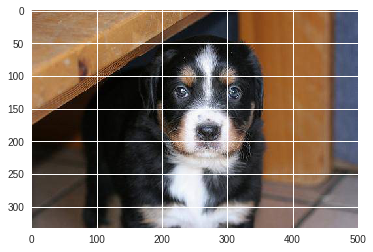

In [34]:
img = plt.imread(f'{PATH}valid/appenzeller/{files[3]}')
plt.imshow(img);

In [14]:
img.shape

(333, 500, 3)

In [15]:
img[:4,:4]

array([[[134, 108,  91],
        [138, 112,  95],
        [144, 117,  98],
        [144, 116,  95]],

       [[137, 110,  91],
        [141, 112,  94],
        [144, 116,  95],
        [147, 116,  96]],

       [[137, 106,  85],
        [137, 105,  84],
        [137, 105,  82],
        [137, 105,  82]],

       [[140, 104,  78],
        [139, 103,  77],
        [139, 103,  77],
        [144, 107,  81]]], dtype=uint8)

In [16]:
start = time.clock()
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.001, 10)
print (time.clock() - start)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28689352.18it/s]


100%|██████████| 4/4 [00:01<00:00,  2.13it/s]


epoch      trn_loss   val_loss   accuracy   
    0      2.912504   2.168039   0.11399   
    1      2.468421   1.572381   0.471503  
    2      2.126735   1.016611   0.84456   
    3      1.827462   0.653202   0.948187  
    4      1.596617   0.448646   0.963731  
    5      1.371655   0.357402   0.968912  
    6      1.164591   0.279606   0.979275  
    7      1.000542   0.241166   0.984456  
    8      0.881954   0.210707   0.979275  
    9      0.777707   0.187941   0.984456  

19.814548000000002


It took only 19s to reach 98% accuracy.

In [17]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [18]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier']

In [19]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(193, 7)

In [20]:
log_preds[:10]

array([[-0.0851 , -4.37359, -4.16122, -5.20221, -4.92738, -4.16671, -3.6837 ],
       [-0.07135, -5.30129, -5.2068 , -5.61926, -5.75722, -5.04224, -3.09766],
       [-0.02475, -5.63506, -6.20234, -7.09093, -6.11088, -6.1462 , -4.29342],
       [-0.08267, -5.78596, -3.53079, -5.45754, -6.66759, -5.0614 , -3.34906],
       [-0.03169, -4.11006, -6.11287, -6.63997, -6.77236, -6.46066, -4.76136],
       [-0.05191, -4.31466, -4.73811, -6.3784 , -6.64567, -4.77854, -4.07135],
       [-1.24908, -2.36366, -1.78745, -1.64908, -2.16279, -2.14926, -3.57668],
       [-0.09064, -4.03123, -4.69513, -5.56616, -5.53601, -4.41098, -3.22266],
       [-0.82329, -3.11905, -3.74006, -3.46939, -3.41515, -2.57467, -1.04164],
       [-0.02504, -5.72546, -5.50704, -7.82125, -5.94419, -5.75278, -4.49083]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,0])        # pr(affenpinscher)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 1), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


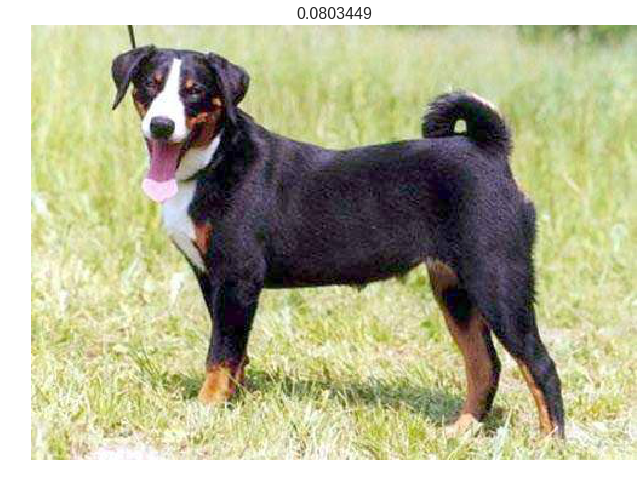

In [25]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


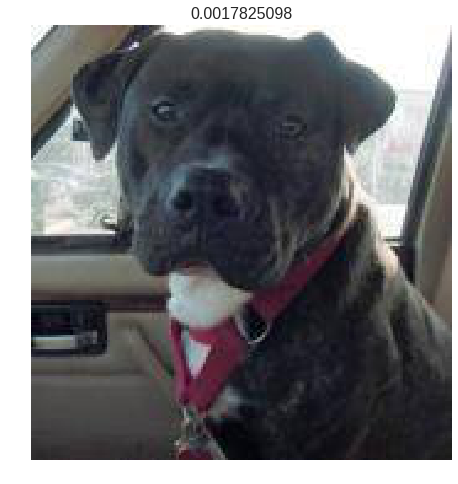

In [26]:
# 2. A few incorrect labels at random
#rand_by_correct(False)
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct dogs


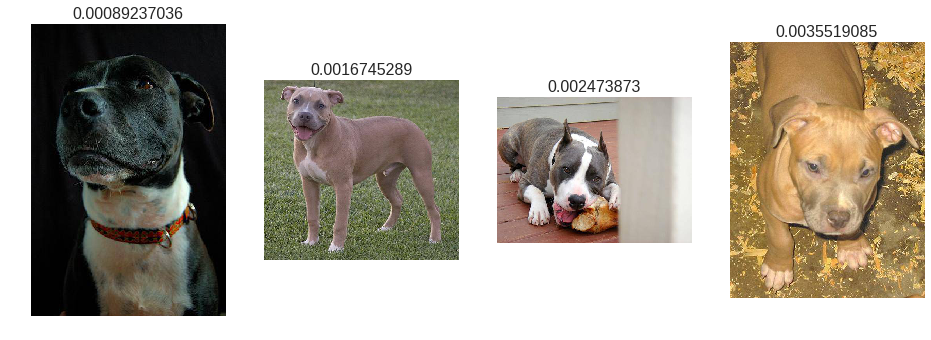

In [35]:
plot_val_with_title(most_by_correct(4, True), "Most correct dogs") #american_staffordshire_terrier

Most correct dog


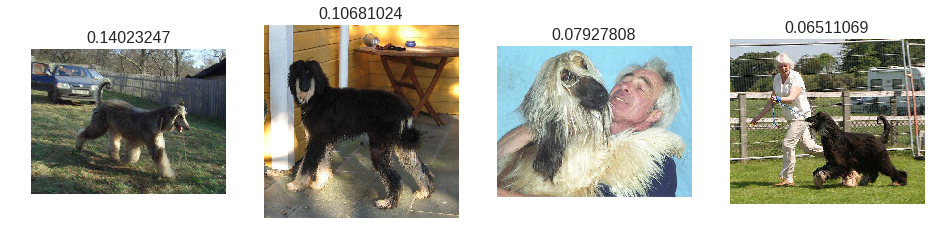

In [39]:
plot_val_with_title(most_by_correct(1, True), "Most correct dog") # afghan_hound

In [36]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect dog") # african_hunting_dog

Most incorrect dog
Not Found.


In [37]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dog")

Most incorrect dog
Not Found.


Most uncertain predictions


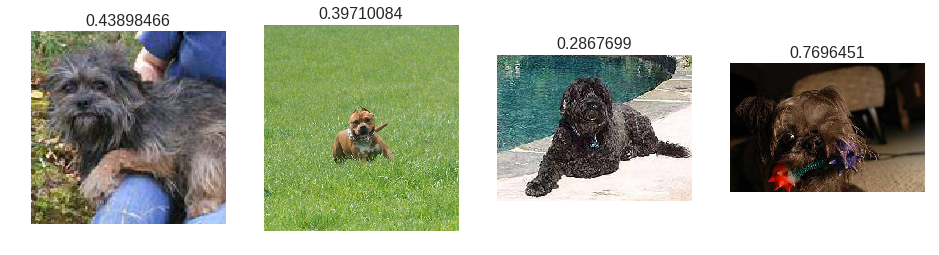

In [38]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")